## Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from scipy import stats
from scipy.stats import norm, skew
from sklearn import ensemble, tree, linear_model
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

## Importando os dados

In [47]:
data = pd.read_csv('https://raw.githubusercontent.com/karloshedylson/ny_rent/main/teste_indicium_precificacao.csv')

In [48]:
data.head()

id                                              nome  host_id  \
0  2595                             Skylit Midtown Castle     2845   
1  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
2  3831                   Cozy Entire Floor of Brownstone     4869   
3  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
4  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name bairro_group        bairro  latitude  longitude  \
0     Jennifer    Manhattan       Midtown  40.75362  -73.98377   
1    Elisabeth    Manhattan        Harlem  40.80902  -73.94190   
2  LisaRoxanne     Brooklyn  Clinton Hill  40.68514  -73.95976   
3        Laura    Manhattan   East Harlem  40.79851  -73.94399   
4        Chris    Manhattan   Murray Hill  40.74767  -73.97500   

         room_type  price  minimo_noites  numero_de_reviews ultima_review  \
0  Entire home/apt    225              1                 45    2019-05-21   
1     Private room    150              3                  0           NaN   
2  Entire home/apt     89              1                270    2019-07-05   
3  Entire home/apt     80             10                  9    2018-11-19   
4  Entire home/apt    200              3                 74    2019-06-22   

   reviews_por_mes  calculado_host_listings_count  disponibilidade_365  
0             0.38                              2                  355  
1              NaN                              1                  365  
2             4.64                              1                  194  
3             0.10                              1                    0  
4             0.59                              1                  129

### Dicionário dos dados

- id – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo
- nome - Representa o nome do anúncio
- host_id - Representa o id do usuário que hospedou o anúncio
- host_name – Contém o nome do usuário que hospedou o anúncio
- bairro_group - Contém o nome do bairro onde o anúncio está localizado
- bairro - Contém o nome da área onde o anúncio está localizado
- latitude - Contém a latitude do local
- longitude - Contém a longitude do local
- room_type – Contém o tipo de espaço de cada anúncio
- price - Contém o preço por noite em dólares listado pelo anfitrião
- minimo_noites - Contém o número mínimo de noites que o usuário deve reservar
- numero_de_reviews - Contém o número de comentários dados a cada listagem
- ultima_review - Contém a data da última revisão dada à listagem
- reviews_por_mes - Contém o número de avaliações fornecidas por mês
- calculado_host_listings_count - Contém a quantidade de listagem por host
- disponibilidade_365 - Contém o número de dias em que o anúncio está disponível para reserva

In [49]:
data.shape

(48894, 16)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

## Lidando com valores nulos

In [51]:
data.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [52]:
# Removendo colunas desnecessárias
data.drop(['id','host_name','ultima_review', 'host_id'], axis=1, inplace=True)

# Trocando os valores nulos por 0
data['reviews_por_mes'].fillna(0, inplace=True)

# Removendo as linhas as linhas que não tem nome
data.dropna(inplace=True)

In [53]:
data.isnull().sum()

nome                             0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64

## Análise Explorátoria dos Dados (EDA)

### Preço

<Axes: xlabel='price', ylabel='Count'>

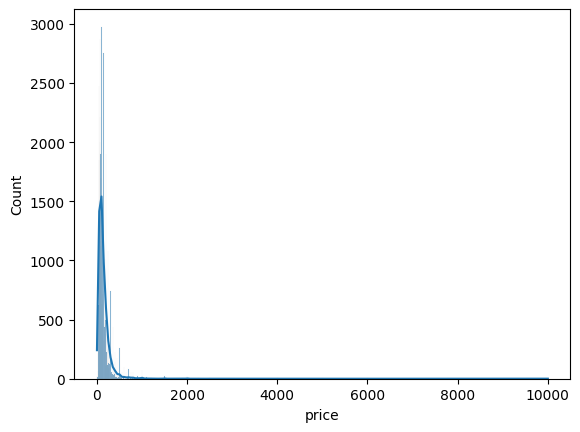

In [54]:
sns.histplot(data['price'], kde=True)

In [55]:
data['price'][data['price'] >= 500].count()

1235

In [56]:
data['price'][data['price'] <= 30].count()

659

In [57]:
# Removendo os valores considerados outliers
data = data[data['price'] <= 500]
data = data[data['price'] >= 30]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47430 entries, 0 to 48893
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   nome                           47430 non-null  object 
 1   bairro_group                   47430 non-null  object 
 2   bairro                         47430 non-null  object 
 3   latitude                       47430 non-null  float64
 4   longitude                      47430 non-null  float64
 5   room_type                      47430 non-null  object 
 6   price                          47430 non-null  int64  
 7   minimo_noites                  47430 non-null  int64  
 8   numero_de_reviews              47430 non-null  int64  
 9   reviews_por_mes                47430 non-null  float64
 10  calculado_host_listings_count  47430 non-null  int64  
 11  disponibilidade_365            47430 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usag

<Axes: xlabel='price', ylabel='Count'>

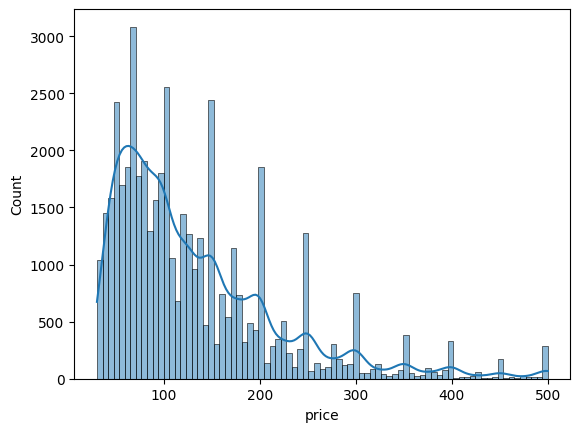

In [58]:
sns.histplot(data['price'], kde=True)

Valores mais consistentes como resultado

### Bairros

In [59]:
data['bairro_group'].value_counts()

Manhattan        20832
Brooklyn         19658
Queens            5555
Bronx             1027
Staten Island      358
Name: bairro_group, dtype: int64

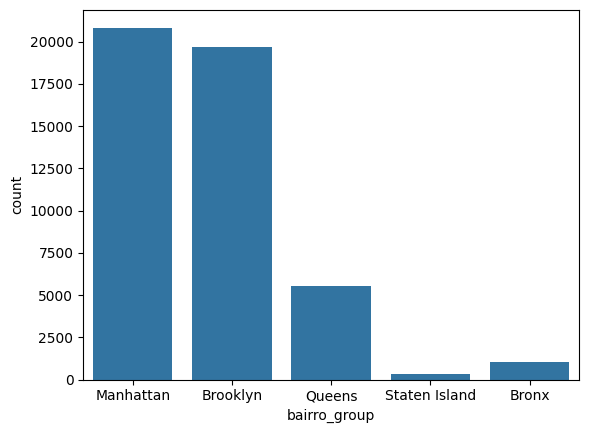

In [60]:
ax = sns.countplot(x="bairro_group", data=data)

In [61]:
# Mapa de Nova York com a geolocalização dos bairros
fig = px.scatter(data, x='longitude', y='latitude',
                 color='bairro_group') # Added color to previous basic
fig.update_layout(xaxis_title="longitude",yaxis_title="latitude")
fig.show()

In [62]:
data['bairro'].value_counts()

Williamsburg          3861
Bedford-Stuyvesant    3640
Harlem                2617
Bushwick              2420
Hell's Kitchen        1895
                      ... 
Graniteville             2
New Dorp                 1
Rossville                1
Richmondtown             1
Willowbrook              1
Name: bairro, Length: 219, dtype: int64

Assim como na coluna price, existem alguns dados outliers que podemos eliminar

In [63]:
# Eliminando os bairros com menos de 200 registros
unique_bairros = data['bairro'].value_counts()
poucos_bairros = unique_bairros[unique_bairros < 200].index
data = data[~data['bairro'].isin(poucos_bairros)]

In [64]:
df=pd.DataFrame(data['bairro'].value_counts()).reset_index().rename(columns={'index': 'bairro','bairro':'count'})
df

bairro  count
0                Williamsburg   3861
1          Bedford-Stuyvesant   3640
2                      Harlem   2617
3                    Bushwick   2420
4              Hell's Kitchen   1895
5             Upper West Side   1893
6                East Village   1812
7             Upper East Side   1754
8               Crown Heights   1527
9                     Midtown   1382
10                East Harlem   1109
11                 Greenpoint   1102
12                    Chelsea   1059
13                    Astoria    890
14            Lower East Side    888
15         Washington Heights    881
16               West Village    720
17         Financial District    718
18                   Flatbush    605
19               Clinton Hill    556
20           Long Island City    533
21  Prospect-Lefferts Gardens    523
22                 Park Slope    491
23              East Flatbush    482
24                Fort Greene    481
25                Murray Hill    466
26                   Kips Bay    450
27                   Flushing    417
28                  Ridgewood    415
29                Sunset Park    376
30          Greenwich Village    373
31                  Chinatown    362
32                  Sunnyside    359
33           Prospect Heights    347
34        Morningside Heights    343
35                   Gramercy    322
36                       SoHo    316
37           Ditmars Steinway    306
38                South Slope    284
39           Theater District    269
40                     Inwood    247
41                    Gowanus    244
42                     Nolita    244
43                   Woodside    234
44                   Elmhurst    228
45            Carroll Gardens    227
46                    Jamaica    224
47              East New York    213

In [65]:
fig = go.Figure(go.Bar(
    x=df['bairro'],y=df['count'],
    marker={'color': df['count'],
    'colorscale': 'Viridis'},
    text=df['count'],
    textposition = "outside",
))
fig.update_layout(xaxis_title="Bairros",yaxis_title="count")
fig.show()

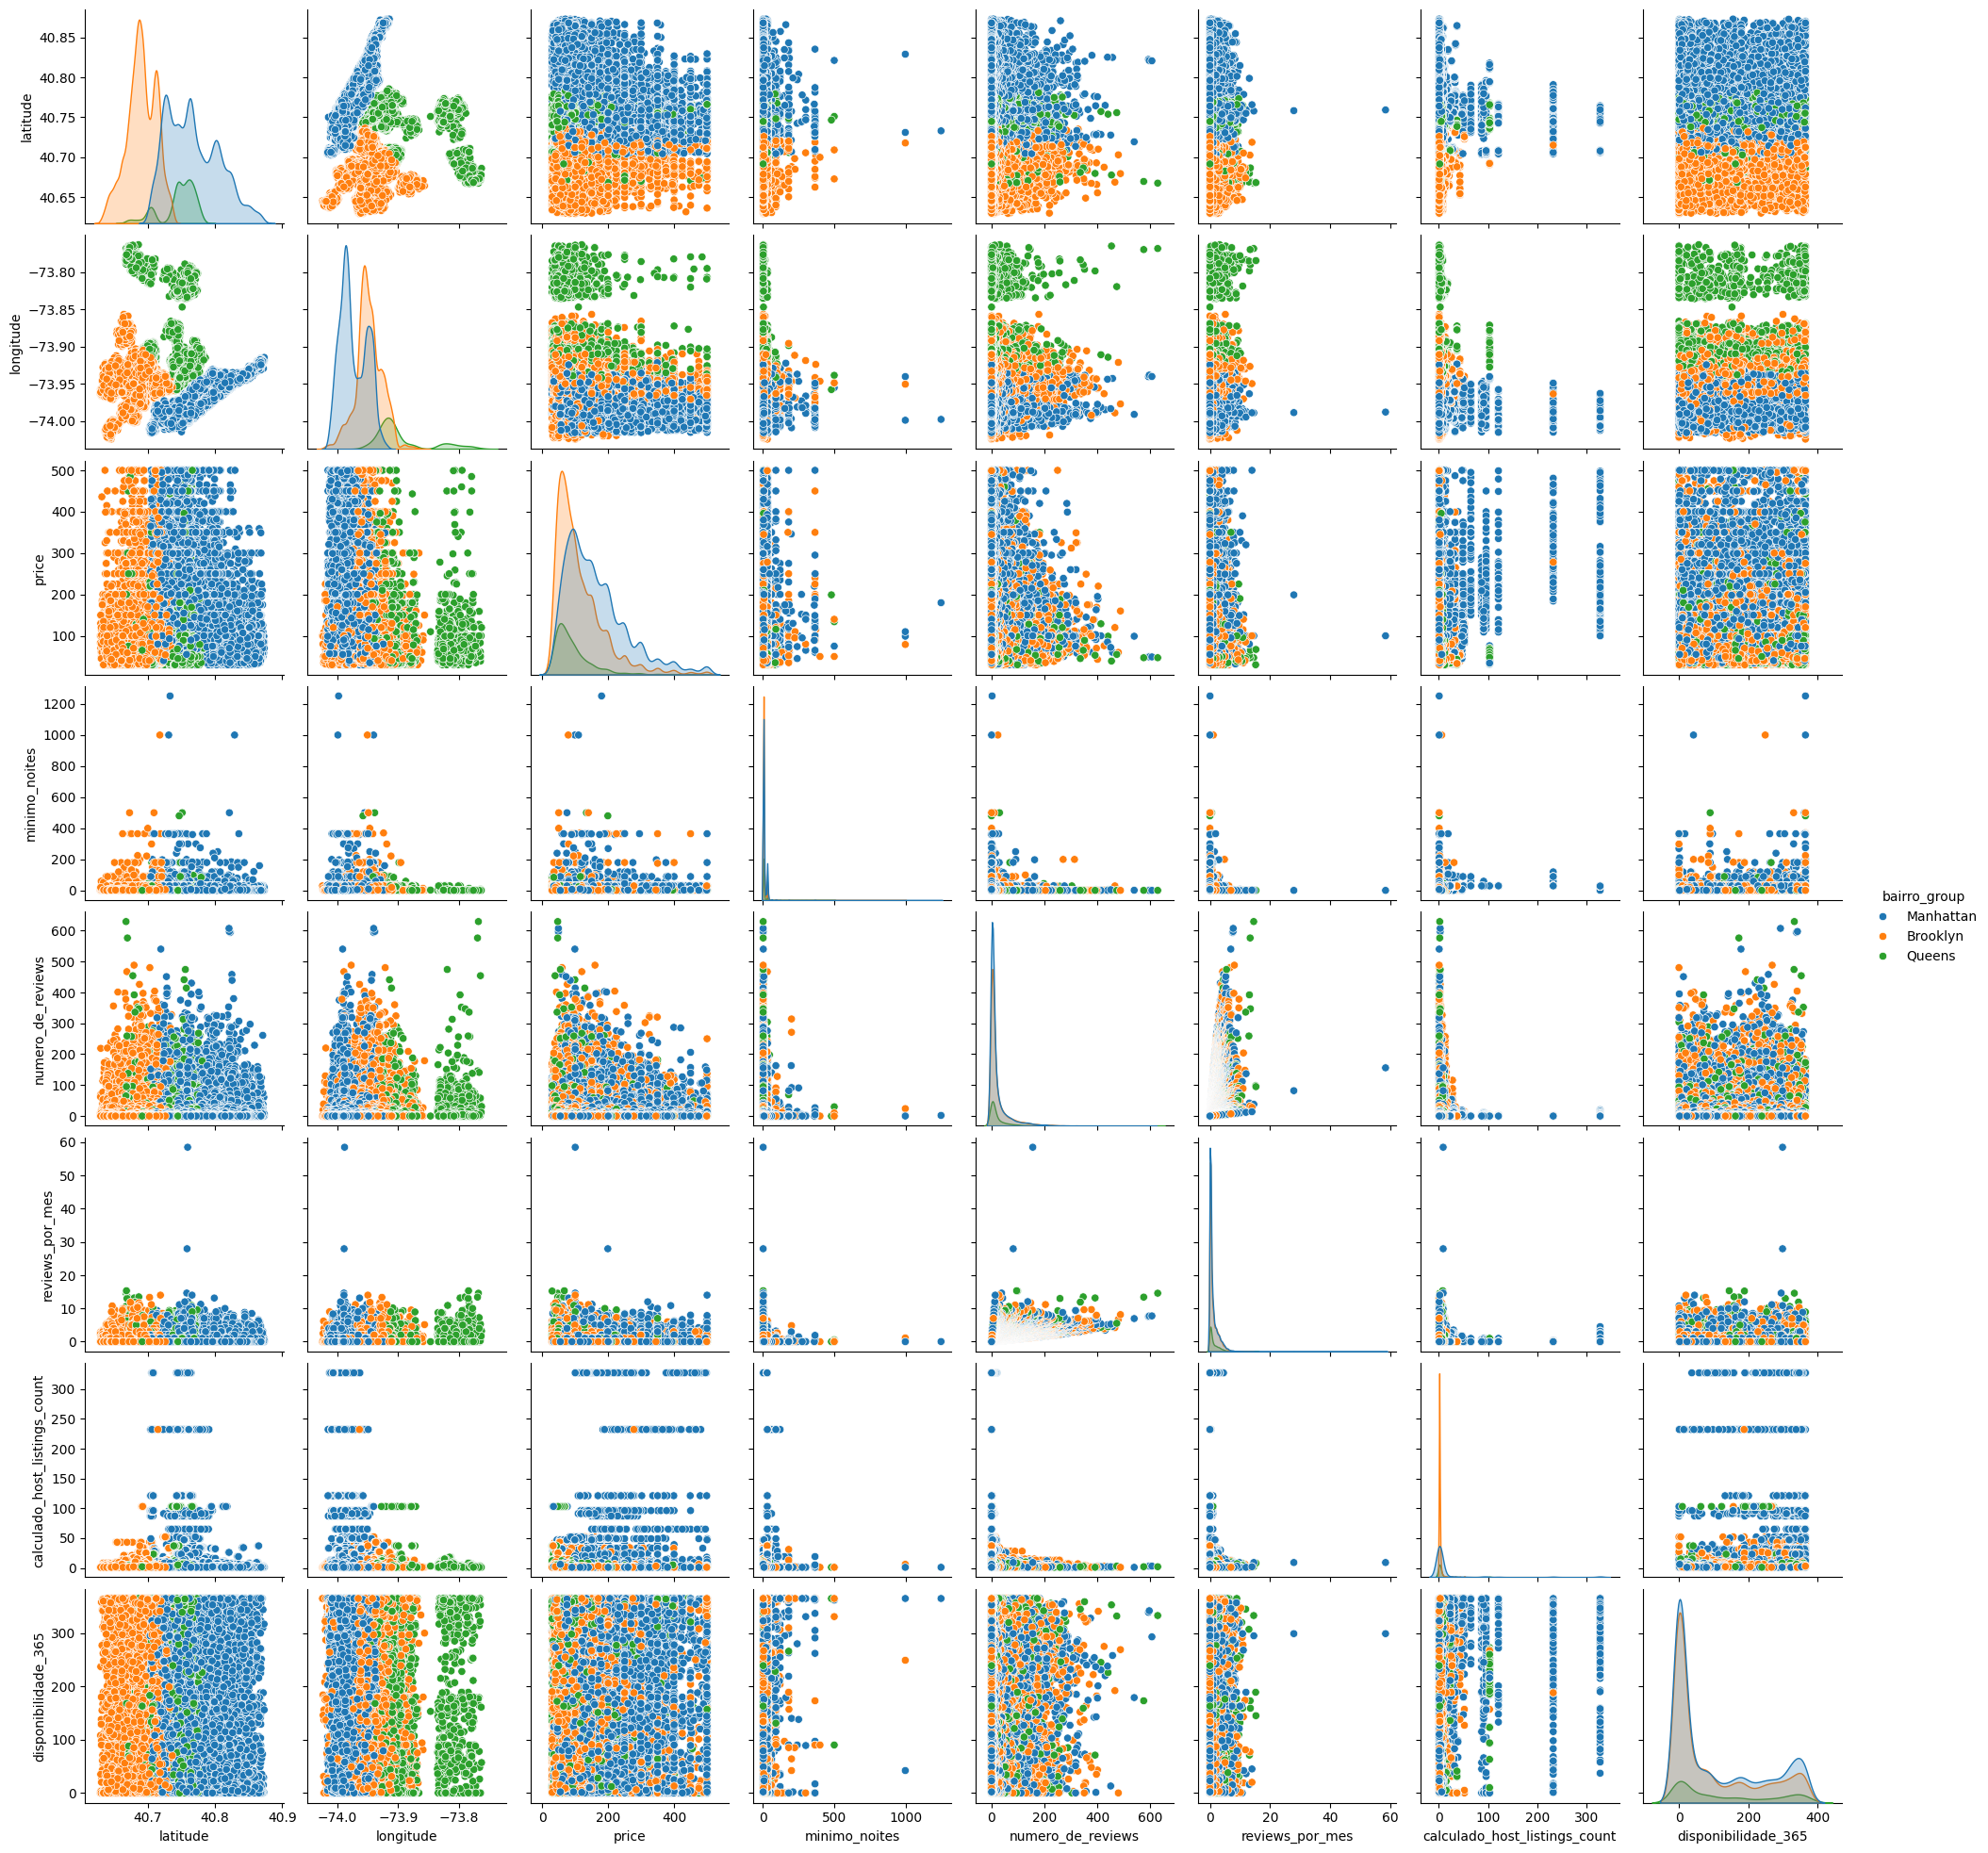

In [74]:
sns.pairplot(data, hue='bairro_group')

### Tipos de quarto

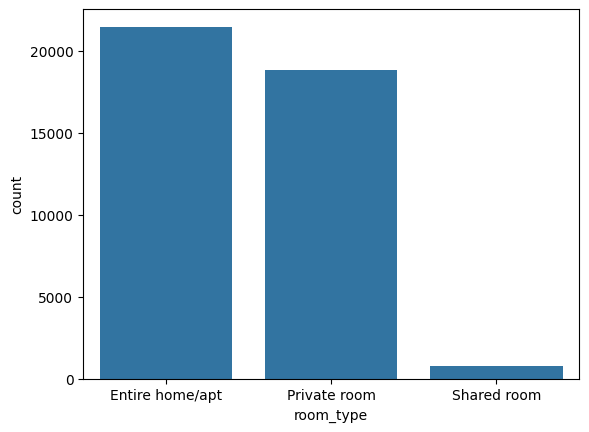

In [66]:
ax = sns.countplot(x="room_type", data=data)

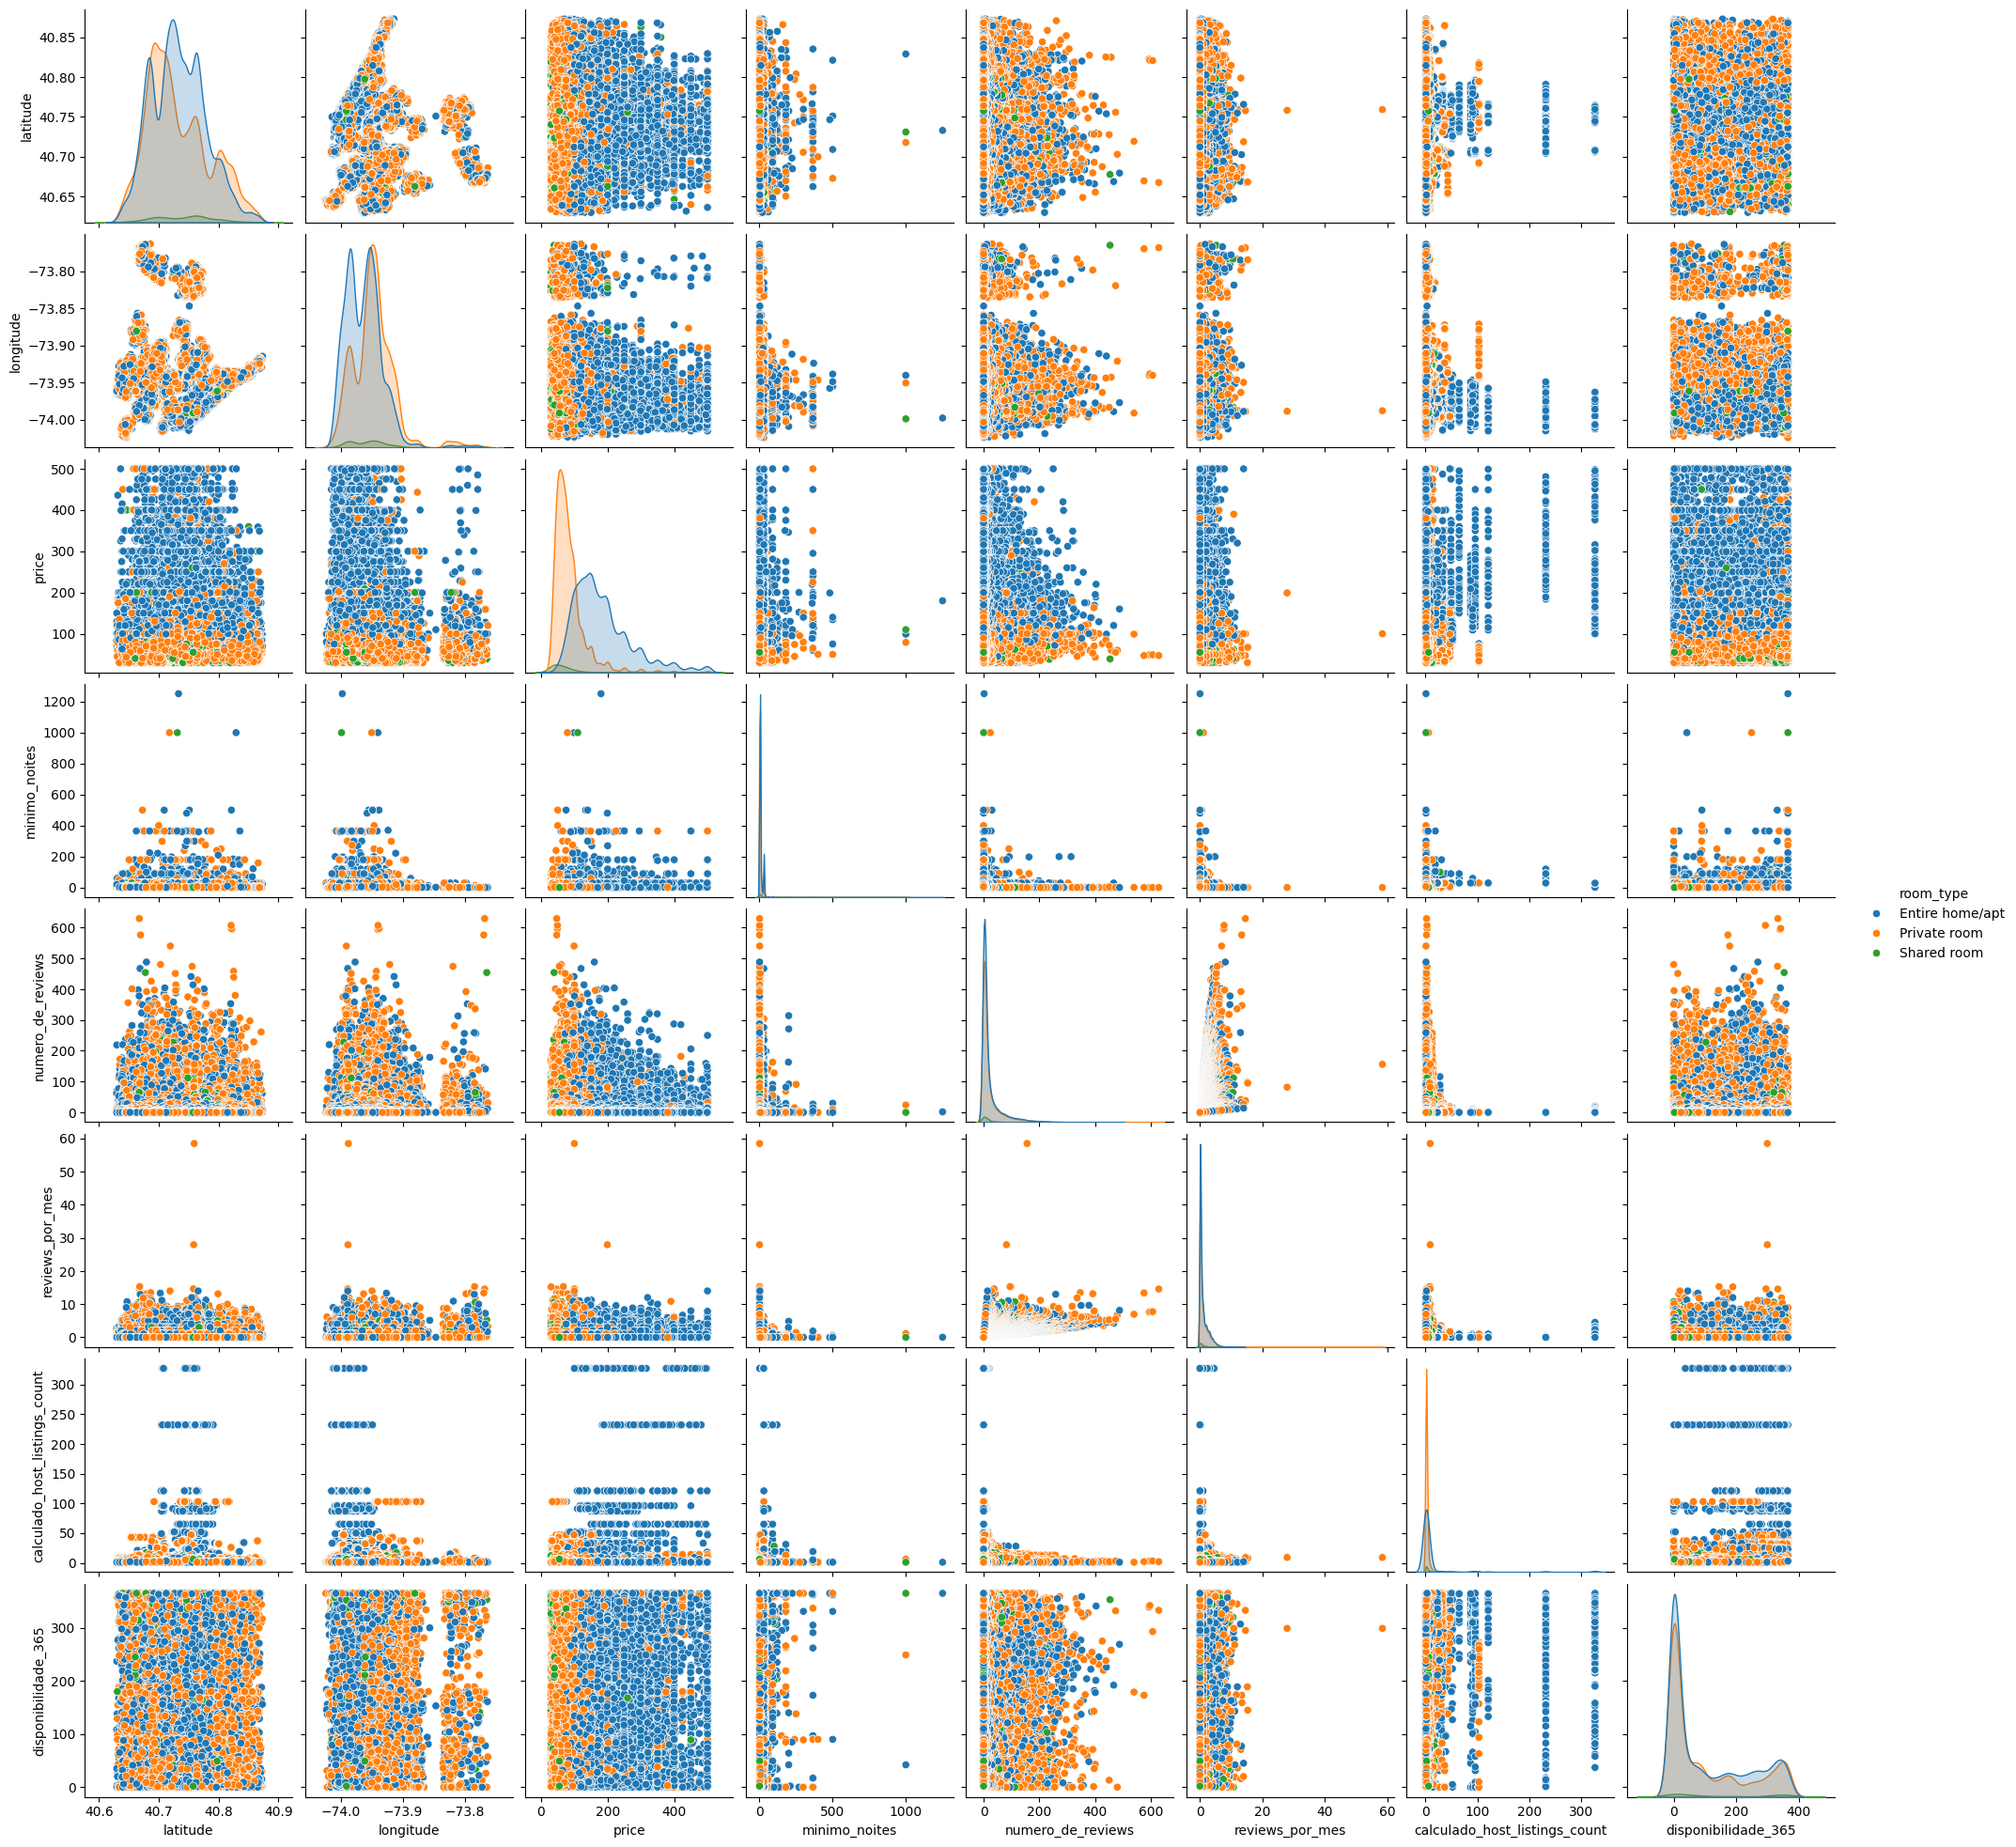

In [75]:
sns.pairplot(data, hue='room_type')

### Correlação de dados

<Axes: xlabel='bairro_group', ylabel='count'>

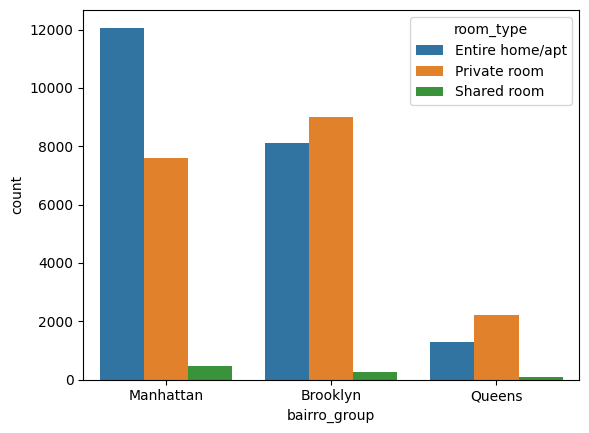

In [67]:
# Correlacioanar o bairro_group com room_type
sns.countplot(x='bairro_group',data=data, hue='room_type')

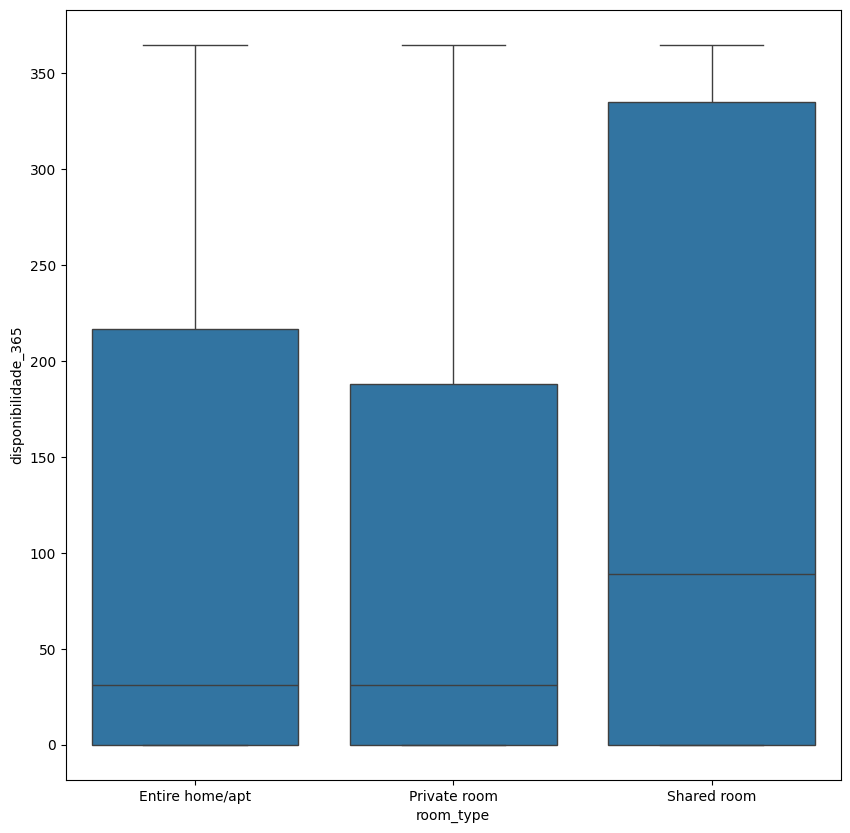

In [68]:
# Correlacionar o room_type com a disponibilidade no ano
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=data, x='room_type',y='disponibilidade_365')

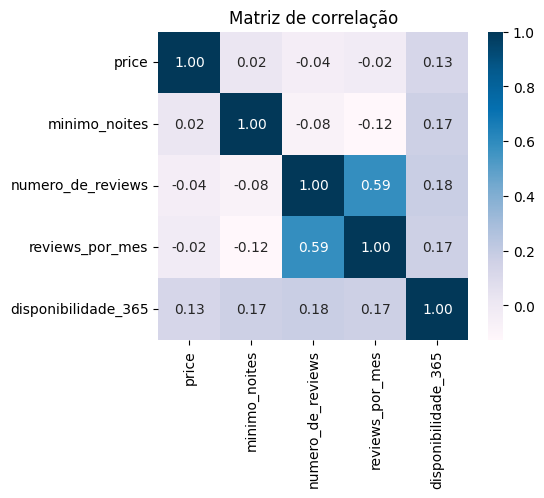

In [69]:
# Selecionando colunas de interesse
colunas = ['price', 'minimo_noites',
       'numero_de_reviews', 'reviews_por_mes',
       'disponibilidade_365']

# Calculando a matriz
correlacao = data[colunas].corr()

# Plotando
plt.figure(figsize=(5, 4))
sns.heatmap(correlacao, annot=True, cmap='PuBu', fmt=".2f")
plt.title('Matriz de correlação')
plt.show()

Nenhuma correlação linear significativa entre o número mínimo de noites e a disponibilidade com o preço.

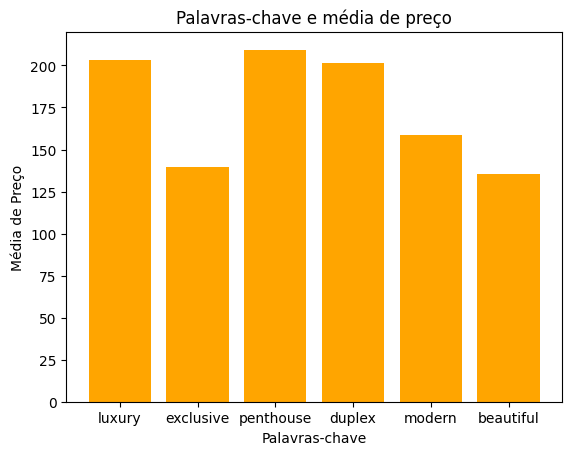

In [72]:
# Palavras-chave
keywords = ['luxury', 'exclusive', 'penthouse', 'duplex', 'modern', 'beautiful']

# Verificar se as palavras-chave estão presentes na coluna 'nome' e calcular a média de preço para cada uma
mean_prices = []
for keyword in keywords:
    mask = data['nome'].str.contains(keyword, case=False)
    mean_price = data.loc[mask, 'price'].mean()
    mean_prices.append(mean_price)

# Plotar o gráfico de barras
plt.bar(keywords, mean_prices, color="orange")
plt.xlabel('Palavras-chave')
plt.ylabel('Média de Preço')
plt.title('Palavras-chave e média de preço')
plt.show()

Ao analisar algumas palavras chaves e o preço, podemos afirmar que descrições como “luxury”, “penthouse” ou “duplex”  indicam, na média, lugares de mais alto valor.

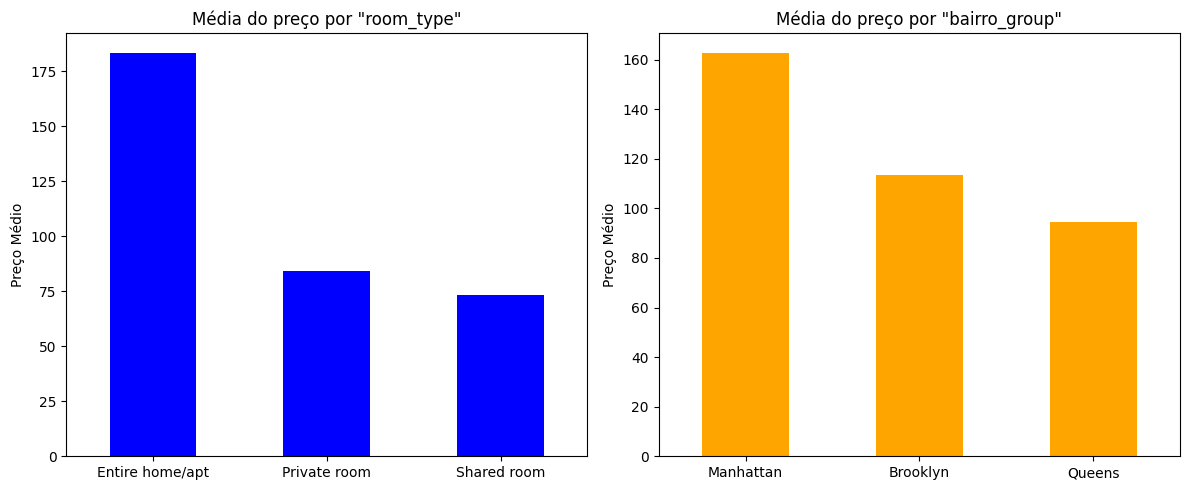

In [121]:
# Criando o plot
plt.figure(figsize=(12, 5))

# Calculando a média do preço para cada tipo de 'room_type'
avg_price_room = data.groupby('room_type')['price'].mean()

plt.subplot(1, 2, 1)
avg_price_room.plot(kind='bar', color='blue')
plt.title('Média do preço por "room_type"')
plt.ylabel('Preço Médio')
plt.xlabel('')
plt.xticks(rotation=0)

# Calculando a média do preço para cada 'bairro_group'
avg_price_bairro = data.groupby('bairro_group')['price'].mean().sort_values(ascending=False)

plt.subplot(1, 2, 2)
avg_price_bairro.plot(kind='bar', color='orange')
plt.title('Média do preço por "bairro_group"')
plt.ylabel('Preço Médio')
plt.xlabel('')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## Preparando os dados

In [98]:
# Definindo os dados de entrada x e saída y:
x = data[['nome', 'bairro_group', 'bairro', 'room_type', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365']]
y = data['price']

# Separando os dados em conjuntos de treinamento e teste
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)

In [94]:
# Definindo quais colunas devem ser processadas com o TfidfVectorizer
text_features = 'nome'

# Definindo quais colunas devem ser codificadas one-hot Encoder
categorical_features = ['bairro_group', 'bairro', 'room_type']

# Definindo quais colunas devem ser padronizadas
numeric_features = ['minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365']

In [95]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Criando um ColumnTransformer para aplicar diferentes transformações a diferentes colunas
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(), 'nome'),  # Aplicar TfidfVectorizer à coluna de texto
        ('categorical', OneHotEncoder(), categorical_features),  # Aplicar OneHotEncoder às colunas categóricas
        ('numeric', StandardScaler(), numeric_features)  # Aplicar StandardScaler às colunas numéricas
    ],
    remainder='passthrough'  # Manter as colunas não transformadas
)

## Testando modelos

### Linear Regression

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linear_model = Pipeline([
    ('preprocessor', preprocessor),  # Aplicar o ColumnTransformer
    ('regressor', LinearRegression())  # Modelo de linear regression
])

In [99]:
linear_model.fit(x_train,y_train)
y_pred=(linear_model.predict(x_test))

print('R-squared train score: {:.3f}'.format(linear_model.score(x_train, y_train)))
print('R-squared test score: {:.3f}'.format(linear_model.score(x_test, y_test)))

R-squared train score: 0.637
R-squared test score: 0.485


### Ridge Regression

In [100]:
from sklearn.linear_model import Ridge

ridge = Pipeline([
    ('preprocessor', preprocessor),  # Aplicar o ColumnTransformer
    ('regressor', Ridge())  # Modelo de ridge regression
])

In [101]:
ridge.fit(x_train, y_train)

y_pred=ridge.predict(x_test)

print('R-squared train score: {:.3f}'.format(ridge.score(x_train, y_train)))
print('R-squared test score: {:.3f}'.format(ridge.score(x_test, y_test)))

R-squared train score: 0.608
R-squared test score: 0.532


### Lasso Regression

In [103]:
from sklearn.linear_model import Lasso

lasso = Pipeline([
    ('preprocessor', preprocessor),  # Aplicar o ColumnTransformer
    ('regressor', Lasso(alpha=10,max_iter = 10000))  # Modelo de lasso regression
])

In [104]:
lasso.fit(x_train, y_train)

print('R-squared score (training): {:.3f}'.format(lasso.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(lasso.score(x_test, y_test)))

R-squared score (training): 0.275
R-squared score (test): 0.276


### Decision Tree Regressor

In [105]:
from sklearn.tree import DecisionTreeRegressor

DTree = Pipeline([
    ('preprocessor', preprocessor),  # Aplica o ColumnTransformer
    ('regressor', DecisionTreeRegressor(min_samples_leaf=.0001))  # Modelo de Support Vector Regression (SVR)
])

In [106]:
DTree.fit(x_train,y_train)

print('R-squared score (training): {:.3f}'.format(DTree.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(DTree.score(x_test, y_test)))

R-squared score (training): 0.806
R-squared score (test): 0.326


### Random Forest Regressor

In [107]:
from sklearn.ensemble import RandomForestRegressor

regressor = Pipeline([
    ('preprocessor', preprocessor),  # Aplica o ColumnTransformer
    ('regressor', RandomForestRegressor(n_estimators = 20, random_state = 0))  # Modelo de Support Vector Regression (SVR)
])

In [108]:
regressor.fit(x_train, y_train)

print('R-squared score (training): {:.3f}'.format(regressor.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(regressor.score(x_test, y_test)))

R-squared score (training): 0.929
R-squared score (test): 0.532


## Modelo de Regressão

O modelo Random Forest Regressor teve o melhor desempenho. Ele obteve o maior R-squared tanto para o conjunto de treinamento quanto para o conjunto de teste.

In [111]:
def transform_test(data):
    X_test = {
        'nome': [data.get('nome')],
        'room_type': [data.get('room_type')],
        'bairro': [data.get('bairro')],
        'bairro_group': [data.get('bairro_group')],
        'minimo_noites': [data.get('minimo_noites')],
        'numero_de_reviews': [data.get('numero_de_reviews')],
        'reviews_por_mes': [data.get('reviews_por_mes')],
        'calculado_host_listings_count': [data.get('calculado_host_listings_count')],
        'disponibilidade_365': [data.get('disponibilidade_365')]
    }
    return pd.DataFrame(X_test)

In [112]:
# Supondo um apartamento com as seguintes características
teste = transform_test({'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'price': 225,
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355})

In [113]:
prediction = regressor.predict(teste)
prediction

array([221.35])

Para um apartamento nessas características, a sugestão de preço seria de $221.35